In [1]:
import numpy as np
import struct as st

In [2]:
import matplotlib.pyplot as plt

In [19]:
import time
import math

In [3]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

--2020-09-10 13:35:02--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  34.2MB/s    in 0.3s    

2020-09-10 13:35:03 (34.2 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]



In [4]:
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2020-09-10 13:35:12--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.02s   

2020-09-10 13:35:12 (1.30 MB/s) - ‘train-labels-idx1-ubyte.gz’ saved [28881/28881]



In [5]:
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

--2020-09-10 13:35:23--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1.6M) [application/x-gzip]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   1.57M  9.57MB/s    in 0.2s    

2020-09-10 13:35:23 (9.57 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [1648877/1648877]



In [6]:
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2020-09-10 13:35:31--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4.4K) [application/x-gzip]
Saving to: ‘t10k-labels-idx1-ubyte.gz’

t10k-labels-idx1-ub 100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-09-10 13:35:31 (427 MB/s) - ‘t10k-labels-idx1-ubyte.gz’ saved [4542/4542]



In [7]:
!gzip -d /content/train-images-idx3-ubyte.gz

In [8]:
!gzip -d /content/train-labels-idx1-ubyte.gz

In [9]:
!gzip -d /content/t10k-labels-idx1-ubyte.gz

In [10]:
!gzip -d /content/t10k-images-idx3-ubyte.gz

In [31]:
trainingfilenames = {'images' : '/content/train-images-idx3-ubyte' ,'labels' : '/content/train-labels-idx1-ubyte'}
testfilenames = {'images' : '/content/t10k-images-idx3-ubyte' ,'labels' : '/content/t10k-labels-idx1-ubyte'}

data_types = {
        0x08: ('ubyte', 'B', 1),
        0x09: ('byte', 'b', 1),
        0x0B: ('>i2', 'h', 2),
        0x0C: ('>i4', 'i', 4),
        0x0D: ('>f4', 'f', 4),
        0x0E: ('>f8', 'd', 8)}

#..........................................................For training dataset..............................................................
print("Training Dataset.......")
stime = time.time()
for name in trainingfilenames.keys():
	if name == 'images':
		train_imagesfile = open(trainingfilenames[name],'rb')
	if name == 'labels':
		train_labelsfile = open(trainingfilenames[name],'rb')#,encoding='latin-1')

train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")

#Information
nDim = magic[3]
print("Data is "+str(nDim)+"-D")
dataType = data_types[magic[2]][0]
print("Data Type :: ",dataType)
dataFormat = data_types[magic[2]][1]
print("Data Format :: ",dataFormat)
dataSize = data_types[magic[2]][2]
print("Data Size :: "+str(dataSize)+" byte\n")

#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)
train_imagesfile.seek(4)
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of columns

train_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
print
#Training set
#Reading the labels
train_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,train_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
train_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,train_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	'''except:
		nbytes = nBytesTot - (nIter-1)*nBytes
		temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,train_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if train_images_array.size == 0:
		train_images_array = temp_images_array
	else:
		train_images_array = np.vstack((train_images_array,temp_images_array))
	temp_images_array = np.array([])
	print("Time taken :: "+str(time.time()-stime)+" seconds\n")
	print(str((float(i+1)/nIter)*100)+"% complete...\n")


print("Training Set Labels shape ::",train_labels_array.shape)
print("Training Set Image shape ::",train_images_array.shape)

print("Time of execution :: "+str(time.time()-stime)+" seconds\n")


Training Dataset.......
Data is 3-D
Data Type ::  ubyte
Data Format ::  B
Data Size :: 1 byte

no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
Time taken :: 0.7911324501037598 seconds

16.666666666666664% complete...

Time taken :: 1.5713651180267334 seconds

33.33333333333333% complete...

Time taken :: 2.312124490737915 seconds

50.0% complete...

Time taken :: 3.122354507446289 seconds

66.66666666666666% complete...

Time taken :: 4.049492597579956 seconds

83.33333333333334% complete...

Time taken :: 4.834778785705566 seconds

100.0% complete...

Training Set Labels shape :: (60000, 1)
Training Set Image shape :: (60000, 28, 28)
Time of execution :: 4.835294246673584 seconds



In [32]:
#..........................................................For test dataset..................................................................
print("Test Dataset.......")
stime = time.time()
for name in testfilenames.keys():
	if name == 'images':
		test_imagesfile = open(testfilenames[name],'rb')
	if name == 'labels':
		test_labelsfile = open(testfilenames[name],'rb')
test_imagesfile.seek(0)
magic = st.unpack('>4B',test_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")

nDim = magic[3]
print("Data is ",nDim,"-D")
print
#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)
test_imagesfile.seek(4)
nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of columns

test_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
print
#Test set
#Reading the labels
test_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,test_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
test_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,test_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	'''except:
		nbytes = nBytesTot - (nIter-1)*nBytes
		temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,test_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if test_images_array.size == 0:
		test_images_array = temp_images_array
	else:
		test_images_array = np.vstack((test_images_array,temp_images_array))
	temp_images_array = np.array([])
	print("Time taken :: "+str(time.time()-stime)+" seconds\n")
	print(str((float(i+1)/nIter)*100)+"% complete...\n")


print("Test Set Labels shape ::",test_labels_array.shape)
print("Test Set Image shape ::",test_images_array.shape)

print("Time of execution : %s seconds" % str(time.time()-stime))

Test Dataset.......
Data is  3 -D
no. of images ::  10000
no. of rows ::  28
no. of columns ::  28
Time taken :: 0.7588319778442383 seconds

100.0% complete...

Test Set Labels shape :: (10000, 1)
Test Set Image shape :: (10000, 28, 28)
Time of execution : 0.7597315311431885 seconds


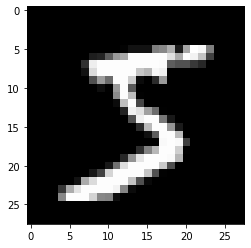

In [33]:
plt.imshow(train_images_array[0],cmap='gray')